<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Objectives" data-toc-modified-id="Objectives-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Objectives</a></span></li><li><span><a href="#Intro" data-toc-modified-id="Intro-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Intro</a></span><ul class="toc-item"><li><span><a href="#Two-Types" data-toc-modified-id="Two-Types-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Two Types</a></span></li></ul></li><li><span><a href="#Create-Some-Noisy-Data" data-toc-modified-id="Create-Some-Noisy-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Create Some Noisy Data</a></span></li><li><span><a href="#AdaBoost-(Adaptive-Boosting)" data-toc-modified-id="AdaBoost-(Adaptive-Boosting)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>AdaBoost (Adaptive Boosting)</a></span><ul class="toc-item"><li><span><a href="#Algorithm" data-toc-modified-id="Algorithm-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Algorithm</a></span></li><li><span><a href="#Voting" data-toc-modified-id="Voting-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Voting</a></span></li><li><span><a href="#AdaBoost-in-Scikit-Learn" data-toc-modified-id="AdaBoost-in-Scikit-Learn-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>AdaBoost in Scikit-Learn</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Hyperparameters" data-toc-modified-id="Hyperparameters-4.3.0.1"><span class="toc-item-num">4.3.0.1&nbsp;&nbsp;</span>Hyperparameters</a></span></li></ul></li><li><span><a href="#Galaxy-Data" data-toc-modified-id="Galaxy-Data-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Galaxy Data</a></span><ul class="toc-item"><li><span><a href="#Hyperparameter-Tuning" data-toc-modified-id="Hyperparameter-Tuning-4.3.1.1"><span class="toc-item-num">4.3.1.1&nbsp;&nbsp;</span>Hyperparameter Tuning</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Gradient-Boosting" data-toc-modified-id="Gradient-Boosting-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Gradient Boosting</a></span><ul class="toc-item"><li><span><a href="#Algorithm" data-toc-modified-id="Algorithm-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Algorithm</a></span></li><li><span><a href="#Example-of-Iterative-Steps" data-toc-modified-id="Example-of-Iterative-Steps-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Example of Iterative Steps</a></span><ul class="toc-item"><li><span><a href="#Recall-our-noisy-data-from-earlier" data-toc-modified-id="Recall-our-noisy-data-from-earlier-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Recall our noisy data from earlier</a></span></li><li><span><a href="#Train-iteratively-on-the-residuals-of-its-predecessor" data-toc-modified-id="Train-iteratively-on-the-residuals-of-its-predecessor-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>Train iteratively on the residuals of its predecessor</a></span></li><li><span><a href="#Observe-how-the-regressor-gets-better" data-toc-modified-id="Observe-how-the-regressor-gets-better-5.2.3"><span class="toc-item-num">5.2.3&nbsp;&nbsp;</span>Observe how the regressor gets better</a></span></li><li><span><a href="#Using-SciKit-learn's-Gradient-Boosting" data-toc-modified-id="Using-SciKit-learn's-Gradient-Boosting-5.2.4"><span class="toc-item-num">5.2.4&nbsp;&nbsp;</span>Using SciKit-learn's Gradient Boosting</a></span></li></ul></li><li><span><a href="#Comparing-gradient-boosting-with-many-estimators" data-toc-modified-id="Comparing-gradient-boosting-with-many-estimators-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Comparing gradient boosting with many estimators</a></span></li></ul></li><li><span><a href="#XGBoost" data-toc-modified-id="XGBoost-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>XGBoost</a></span><ul class="toc-item"><li><span><a href="#XGBoost-Regression" data-toc-modified-id="XGBoost-Regression-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>XGBoost Regression</a></span></li></ul></li><li><span><a href="#Level-Up:-Regression-or-Classification?" data-toc-modified-id="Level-Up:-Regression-or-Classification?-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Level Up: Regression or Classification?</a></span><ul class="toc-item"><li><span><a href="#Adaboost-Classification" data-toc-modified-id="Adaboost-Classification-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Adaboost Classification</a></span></li><li><span><a href="#GradientBoosting" data-toc-modified-id="GradientBoosting-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>GradientBoosting</a></span></li><li><span><a href="#XGBoost-Classification" data-toc-modified-id="XGBoost-Classification-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>XGBoost Classification</a></span></li></ul></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
seed = 42
np.random.seed(seed)

from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, \
AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeRegressor

import xgboost

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import precision_score, recall_score, confusion_matrix


%matplotlib inline

# Objectives

- Describe boosting algorithms
- Implement boosting models with `sklearn` 
- Implement boosting models with `XGBoost`

# Intro

One of the problems with using single decision trees and random forests is that, once I make a split, I can't go back and consider how another feature varies across the whole dataset. But suppose I were to consider **my tree's errors**. The fundamental idea of ***boosting*** is to start with a weak learner and then to use information about its errors to build a new model that can supplement the original model.

## Two Types

The two main types of boosting available in Scikit-Learn are adaptive boosting (AdaBoostClassifier, AdaBoostRegressor) and gradient boosting (GradientBoostingClassifier, GradientBoostingRegressor).

Again, the fundamental idea of boosting is to use a sequence of **weak** learners to build a model. Though the individual learners are weak, the idea is to train iteratively in order to produce a better predictor. More specifically, the first learner will be trained on the data as it stands, but future learners will be trained on modified versions of the data. The point of the modifications is to highlight the "hard-to-predict-accurately" portions of the data.

# Create Some Noisy Data

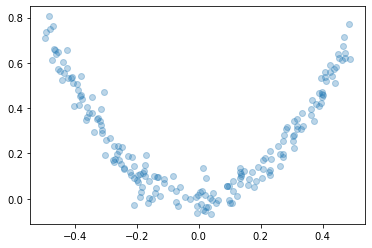

In [2]:
n = 200
X = np.random.rand(n, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(n)

fig, ax = plt.subplots()
ax.scatter(X, y, alpha=0.3);

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed)

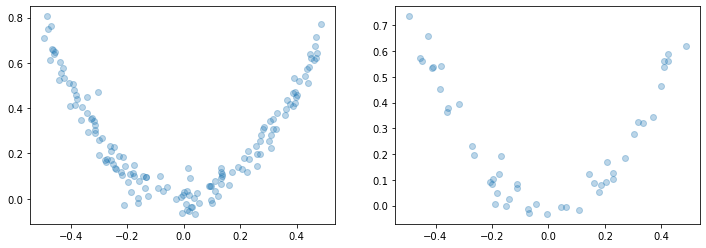

In [4]:
f, (ax0,ax1) = plt.subplots(ncols=2, figsize=(12,4))
ax0.scatter(X_train, y_train, alpha=0.3)
ax1.scatter(X_test, y_test, alpha=0.3);

# AdaBoost (Adaptive Boosting)

- **AdaBoost** works by iteratively adapting two related series of weights, one attached to the datapoints and the other attached to the learners themselves. Datapoints that are incorrectly classified receive greater weights for the next learner in the sequence. That way, future learners will be more likely to focus on those datapoints. At the end of the sequence, the learners that make better predictions, especially on the datapoints that are more resistant to correct classification, receive more weight in the final "vote" that determines the ensemble's prediction. <br/> Suppose we have a binary classification problem and we represent the two classes with 1 and -1. (This is standard for describing the algorithm of AdaBoost.) <br/>
Then, in a nutshell: <br/>
    1. Train a weak learner. <br/>
    2. Calculate its error $\epsilon$. <br/>
    3. Use that error as a weight on the classifier: $\theta = \frac{1}{2}ln\left(\frac{1-\epsilon}{\epsilon}\right)$. <br/>
    Note that $\theta$ CAN be negative. This represents a classifier whose accuracy is _worse_ than chance. <br/>
    4. Use _that_ to adjust the data points' weights: $w_{n+1} = w_n\left(\frac{e^{\pm\theta}}{scaler}\right)$. Use $+\theta$ for incorrect predictions, $-\theta$ for correct predictions. <br/>  $\rightarrow$ For more detail on AdaBoost, see [here](https://www.analyticsvidhya.com/blog/2021/09/adaboost-algorithm-a-complete-guide-for-beginners/).

## Algorithm

- Train model
- Inflate errors
- Retrain model using errors (repeat)

![](images/adaboost.png)

## Voting

Combine weak learners

+ Vote by combining these calculated $y$ for each crossed-area (negative for "not blue" or whatever)

## AdaBoost in Scikit-Learn

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html

In [5]:
model = AdaBoostRegressor()
model.fit(X_train, y_train)
model.predict(X_train)

array([0.05414538, 0.20400897, 0.38853349, 0.27864377, 0.38254987,
       0.27864377, 0.64675019, 0.67698499, 0.04630117, 0.04630117,
       0.04730744, 0.04630117, 0.38254987, 0.34549395, 0.27224005,
       0.04630117, 0.66224273, 0.17015635, 0.41309818, 0.04630117,
       0.23473037, 0.385444  , 0.05414538, 0.04630117, 0.46578038,
       0.27224005, 0.21480914, 0.66264678, 0.68871023, 0.38254987,
       0.11418124, 0.54986398, 0.05235803, 0.04630117, 0.46578038,
       0.05235803, 0.05414538, 0.05235803, 0.48319554, 0.16690204,
       0.05414538, 0.17015635, 0.05414538, 0.6216449 , 0.66264678,
       0.04730744, 0.11418124, 0.5784184 , 0.04630117, 0.27224005,
       0.38853349, 0.56395257, 0.04630117, 0.66224273, 0.53784776,
       0.09905035, 0.7526262 , 0.31910395, 0.54342341, 0.04935602,
       0.05235803, 0.04730744, 0.43029055, 0.04630117, 0.22841543,
       0.42853641, 0.09905035, 0.16690204, 0.04630117, 0.04730744,
       0.41309818, 0.20400897, 0.17015635, 0.05631662, 0.25608

In [6]:
model.score(X_test,y_test)

0.9429540642415644

#### Hyperparameters

`base_estimator`: The model utilized for the weak learners (Warning: Don't forget to import the model that you decide to use for the weak learner).
`n_estimators`: The maximum number of weak learners used.

In [7]:
model = AdaBoostRegressor(
            base_estimator=DecisionTreeRegressor(max_depth=6), 
            n_estimators=200,
            random_state=27
)

model.fit(X_train, y_train)
model.score(X_test,y_test)

0.9491419730066043

### Galaxy Data

In [8]:
galaxies = pd.read_csv('data/COMBO17.csv')
galaxies.head()

,Nr,Rmag,e.Rmag,ApDRmag,mumax,Mcz,e.Mcz,MCzml,chi2red,UjMAG,...,UFS,e.UFS,BFS,e.BFS,VFD,e.VFD,RFS,e.RFS,IFD,e.IFD
0,6,24.995,0.097,0.935,24.214,0.832,0.036,1.400,0.64,-17.67,...,0.01870,0.00239,0.01630,0.00129,0.017300,0.00141,0.01650,0.000434,0.02470,0.00483
1,9,25.013,0.181,-0.135,25.303,0.927,0.122,0.864,0.41,-18.28,...,0.00706,0.00238,0.00420,0.00115,0.003930,0.00182,0.00723,0.000500,0.00973,0.00460
2,16,24.246,0.054,0.821,23.511,1.202,0.037,1.217,0.92,-19.75,...,0.01260,0.00184,0.01830,0.00115,0.018800,0.00167,0.02880,0.000655,0.05700,0.00465
3,21,25.203,0.128,0.639,24.948,0.912,0.177,0.776,0.39,-17.83,...,0.01410,0.00186,0.01180,0.00110,0.009670,0.00204,0.01050,0.000416,0.01340,0.00330
4,26,25.504,0.112,-1.588,24.934,0.848,0.067,1.330,1.45,-17.69,...,0.00514,0.00170,0.00102,0.00127,0.000039,0.00160,0.00139,0.000499,0.00590,0.00444


This is a dataset about galaxies. The Mcz and MCzml columns are measures of redshift, which is our target. Mcz is usually understood to be a better measure, so that will be our target column. Many of the other columns have to do with various measures of galaxies' magnitudes. For more on the dataset, see [here](https://astrostatistics.psu.edu/datasets/COMBO17.html).

In [9]:
galaxies.columns

Index(['Nr', 'Rmag', 'e.Rmag', 'ApDRmag', 'mumax', 'Mcz', 'e.Mcz', 'MCzml',
       'chi2red', 'UjMAG', 'e.UjMAG', 'BjMAG', 'e.BjMAG', 'VjMAG', 'e.VjMAG',
       'usMAG', 'e.usMAG', 'gsMAG', 'e.gsMAG', 'rsMAG', 'e.rsMAG', 'UbMAG',
       'e.UbMAG', 'BbMAG', 'e.BbMAG', 'VnMAG', 'e.VbMAG', 'S280MAG',
       'e.S280MA', 'W420FE', 'e.W420FE', 'W462FE', 'e.W462FE', 'W485FD',
       'e.W485FD', 'W518FE', 'e.W518FE', 'W571FS', 'e.W571FS', 'W604FE',
       'e.W604FE', 'W646FD', 'e.W646FD', 'W696FE', 'e.W696FE', 'W753FE',
       'e.W753FE', 'W815FS', 'e.W815FS', 'W856FD', 'e.W856FD', 'W914FD',
       'e.W914FD', 'W914FE', 'e.W914FE', 'UFS', 'e.UFS', 'BFS', 'e.BFS', 'VFD',
       'e.VFD', 'RFS', 'e.RFS', 'IFD', 'e.IFD'],
      dtype='object')

In [12]:
galaxies.isnull().sum().sum()

50

In [13]:
galaxies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3462 entries, 0 to 3461
Data columns (total 65 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Nr        3462 non-null   int64  
 1   Rmag      3462 non-null   float64
 2   e.Rmag    3462 non-null   float64
 3   ApDRmag   3462 non-null   float64
 4   mumax     3462 non-null   float64
 5   Mcz       3462 non-null   float64
 6   e.Mcz     3462 non-null   float64
 7   MCzml     3462 non-null   float64
 8   chi2red   3462 non-null   float64
 9   UjMAG     3462 non-null   float64
 10  e.UjMAG   3462 non-null   float64
 11  BjMAG     3462 non-null   float64
 12  e.BjMAG   3462 non-null   float64
 13  VjMAG     3462 non-null   float64
 14  e.VjMAG   3462 non-null   float64
 15  usMAG     3462 non-null   float64
 16  e.usMAG   3462 non-null   float64
 17  gsMAG     3462 non-null   float64
 18  e.gsMAG   3462 non-null   float64
 19  rsMAG     3462 non-null   float64
 20  e.rsMAG   3462 non-null   floa

In [14]:
galaxies = galaxies.dropna()

Let's collect together the columns that have high correlation with Mcz, our target:

In [15]:
preds = []
for ind in galaxies.corr()['Mcz'].index:
    if abs(galaxies.corr()['Mcz'][ind]) > 0.5:
        preds.append(ind)

In [17]:
galaxies.corr()

,Nr,Rmag,e.Rmag,ApDRmag,mumax,Mcz,e.Mcz,MCzml,chi2red,UjMAG,...,UFS,e.UFS,BFS,e.BFS,VFD,e.VFD,RFS,e.RFS,IFD,e.IFD
Nr,1.000000,-0.005210,-0.007680,0.015953,-0.003774,0.006878,-0.002385,0.025835,-0.052092,-0.015072,...,0.000132,-0.012677,-0.004281,0.028188,-0.009254,-0.034176,-0.007802,-0.020076,-0.007046,-0.015396
Rmag,-0.005210,1.000000,0.860248,0.682817,0.932250,0.415197,0.565422,0.431953,0.150438,0.312837,...,-0.598822,-0.250884,-0.524007,-0.396827,-0.472032,-0.358315,-0.473128,-0.377661,-0.471239,-0.323251
e.Rmag,-0.007680,0.860248,1.000000,0.529213,0.804649,0.352610,0.527505,0.384330,0.219683,0.286669,...,-0.369064,-0.163352,-0.268880,-0.186995,-0.220396,-0.146331,-0.220135,-0.158715,-0.221393,-0.130967
ApDRmag,0.015953,0.682817,0.529213,1.000000,0.436047,0.192896,0.254642,0.189870,0.112423,0.306930,...,-0.257780,-0.124889,-0.237142,-0.191428,-0.214856,-0.175414,-0.219341,-0.184273,-0.221942,-0.165973
mumax,-0.003774,0.932250,0.804649,0.436047,1.000000,0.434001,0.577577,0.449315,0.113127,0.239650,...,-0.648348,-0.269754,-0.573801,-0.434571,-0.522029,-0.394071,-0.522072,-0.418112,-0.519138,-0.352968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
e.VFD,-0.034176,-0.358315,-0.146331,-0.175414,-0.394071,-0.152255,-0.129053,-0.150809,-0.006387,-0.075088,...,0.716257,0.353686,0.846081,0.794005,0.857268,1.000000,0.851001,0.868680,0.839795,0.798409
RFS,-0.007802,-0.473128,-0.220135,-0.219341,-0.522072,-0.210857,-0.204624,-0.200020,0.015149,-0.095700,...,0.792701,0.253880,0.956095,0.802324,0.993831,0.851001,1.000000,0.918868,0.994699,0.832182
e.RFS,-0.020076,-0.377661,-0.158715,-0.184273,-0.418112,-0.162231,-0.138586,-0.151746,0.021924,-0.077262,...,0.723229,0.375643,0.880599,0.836929,0.912540,0.868680,0.918868,1.000000,0.910716,0.859191
IFD,-0.007046,-0.471239,-0.221393,-0.221942,-0.519138,-0.180216,-0.201880,-0.172369,0.013471,-0.127278,...,0.751873,0.240367,0.931672,0.781816,0.980213,0.839795,0.994699,0.910716,1.000000,0.831198


In [16]:
galaxies[preds].corr()

,Mcz,e.Mcz,MCzml,UjMAG,BjMAG,VjMAG,usMAG,gsMAG,rsMAG,UbMAG,BbMAG,VnMAG,S280MAG
Mcz,1.000000,0.613071,0.872016,-0.699550,-0.628226,-0.641983,-0.698304,-0.652170,-0.631398,-0.699731,-0.659506,-0.641870,-0.700453
e.Mcz,0.613071,1.000000,0.590179,-0.170296,-0.122309,-0.122616,-0.168326,-0.126491,-0.114022,-0.170208,-0.130680,-0.122546,-0.169344
MCzml,0.872016,0.590179,1.000000,-0.565663,-0.520006,-0.532880,-0.563591,-0.536750,-0.525495,-0.565406,-0.544325,-0.532837,-0.562474
UjMAG,-0.699550,-0.170296,-0.565663,1.000000,0.933252,0.961088,0.999865,0.970124,0.954853,0.999986,0.975476,0.960981,0.963415
BjMAG,-0.628226,-0.122309,-0.520006,0.933252,1.000000,0.950728,0.932328,0.954006,0.947597,0.932831,0.957836,0.950694,0.885382
VjMAG,-0.641983,-0.122616,-0.532880,0.961088,0.950728,1.000000,0.959432,0.997956,0.999324,0.960265,0.992178,0.999997,0.894171
usMAG,-0.698304,-0.168326,-0.563591,0.999865,0.932328,0.959432,1.000000,0.968971,0.953027,0.999903,0.974515,0.959320,0.964972
gsMAG,-0.652170,-0.126491,-0.536750,0.970124,0.954006,0.997956,0.968971,1.000000,0.995436,0.969562,0.995887,0.997923,0.914118
rsMAG,-0.631398,-0.114022,-0.525495,0.954853,0.947597,0.999324,0.953027,0.995436,1.000000,0.953909,0.988695,0.999341,0.882782
UbMAG,-0.699731,-0.170208,-0.565406,0.999986,0.932831,0.960265,0.999903,0.969562,0.953909,1.000000,0.975035,0.960155,0.964189


These various magnitude columns all have high correlations **with one another**! Let's try a simple model with just the S280MAG column, since it has the highest correlation with Mcz.

In [18]:
galaxies_x = galaxies['S280MAG']
galaxies_y = galaxies['Mcz']

In [21]:
galaxies_x

0      -18.22
1      -17.97
2      -19.77
3      -18.12
4      -13.93
        ...  
3457   -18.29
3458   -20.62
3459   -19.44
3460   -20.10
3461   -17.71
Name: S280MAG, Length: 3438, dtype: float64

Since we only have one predictor, we can visualize the correlation with the target! We can also reshape it for modeling purposes!

In [19]:
galaxies_x_rev = galaxies_x.values.reshape(-1, 1)

In [22]:
galaxies_x_rev

array([[-18.22],
       [-17.97],
       [-19.77],
       ...,
       [-19.44],
       [-20.1 ],
       [-17.71]])

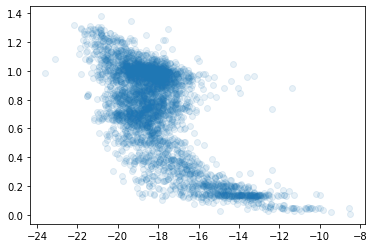

In [20]:
fig, ax = plt.subplots()

ax.scatter(galaxies_x_rev, galaxies_y, alpha=0.1);

In [23]:
galaxies_x_train, galaxies_x_test, galaxies_y_train, galaxies_y_test =\
train_test_split(galaxies_x_rev, galaxies_y, random_state=42)

In [24]:
abr = AdaBoostRegressor(random_state=42)

abr.fit(galaxies_x_train, galaxies_y_train)

AdaBoostRegressor(random_state=42)

In [26]:
abr.score(galaxies_x_train, galaxies_y_train)

0.5092939137096737

In [25]:
cross_val_score(abr, galaxies_x_train, galaxies_y_train, cv=5)

array([0.48891095, 0.42071752, 0.53158551, 0.51183824, 0.44177733])

#### Hyperparameter Tuning

Let's see if we can do better by trying different hyperparameter values:

In [47]:
gs = GridSearchCV(estimator=abr,
                 param_grid={
                     'n_estimators': [25, 50, 100],
                     'loss': ['linear', 'square']
                 }, cv=5, verbose=3, n_jobs=-3)

In [49]:
gs.fit(galaxies_x_train, galaxies_y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-3)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-3)]: Done  30 out of  30 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=-3)]: Done  30 out of  30 | elapsed:    1.6s finished


GridSearchCV(cv=5, estimator=AdaBoostRegressor(random_state=42), n_jobs=-3,
             param_grid={'loss': ['linear', 'square'],
                         'n_estimators': [25, 50, 100]},
             verbose=3)

In [29]:
gs.best_params_

{'loss': 'linear', 'n_estimators': 25}

In [30]:
gs.best_score_

0.4789659107735619

In [35]:
gs2 = GridSearchCV(estimator=abr,
                 param_grid={
                     'n_estimators': [20, 25, 30],
                     'loss': ['linear', 'square']
                 }, cv=5, verbose=3)

In [41]:
gs2.fit(galaxies_x_train, galaxies_y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] loss=linear, n_estimators=20 ....................................
[CV] ........ loss=linear, n_estimators=20, score=0.489, total=   0.0s
[CV] loss=linear, n_estimators=20 ....................................
[CV] ........ loss=linear, n_estimators=20, score=0.421, total=   0.0s
[CV] loss=linear, n_estimators=20 ....................................
[CV] ........ loss=linear, n_estimators=20, score=0.532, total=   0.0s
[CV] loss=linear, n_estimators=20 ....................................
[CV] ........ loss=linear, n_estimators=20, score=0.512, total=   0.0s
[CV] loss=linear, n_estimators=20 ....................................
[CV] ........ loss=linear, n_estimators=20, score=0.442, total=   0.0s
[CV] loss=linear, n_estimators=25 ....................................
[CV] ........ loss=linear, n_estimators=25, score=0.489, total=   0.0s
[CV] loss=linear, n_estimators=25 ....................................
[CV] ........ los

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] ........ loss=linear, n_estimators=25, score=0.512, total=   0.0s
[CV] loss=linear, n_estimators=25 ....................................
[CV] ........ loss=linear, n_estimators=25, score=0.442, total=   0.0s
[CV] loss=linear, n_estimators=30 ....................................
[CV] ........ loss=linear, n_estimators=30, score=0.489, total=   0.0s
[CV] loss=linear, n_estimators=30 ....................................
[CV] ........ loss=linear, n_estimators=30, score=0.421, total=   0.0s
[CV] loss=linear, n_estimators=30 ....................................
[CV] ........ loss=linear, n_estimators=30, score=0.532, total=   0.0s
[CV] loss=linear, n_estimators=30 ....................................
[CV] ........ loss=linear, n_estimators=30, score=0.512, total=   0.0s
[CV] loss=linear, n_estimators=30 ....................................
[CV] ........ loss=linear, n_estimators=30, score=0.442, total=   0.0s
[CV] loss=square, n_estimators=20 ....................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.8s finished


GridSearchCV(cv=5, estimator=AdaBoostRegressor(random_state=42),
             param_grid={'loss': ['linear', 'square'],
                         'n_estimators': [20, 25, 30]},
             verbose=3)

In [42]:
gs2.best_params_

{'loss': 'linear', 'n_estimators': 20}

In [44]:
gs3 = GridSearchCV(estimator=abr,
                 param_grid={
                     'n_estimators': [20, 25, 30],
                     'loss': ['linear', 'square']
                 }, cv=5, verbose=3)

In [45]:
gs3.fit(galaxies_x_train, galaxies_y_train)
gs3.best_params_

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] loss=linear, n_estimators=20 ....................................
[CV] ........ loss=linear, n_estimators=20, score=0.489, total=   0.0s
[CV] loss=linear, n_estimators=20 ....................................
[CV] ........ loss=linear, n_estimators=20, score=0.421, total=   0.0s
[CV] loss=linear, n_estimators=20 ....................................
[CV] ........ loss=linear, n_estimators=20, score=0.532, total=   0.0s
[CV] loss=linear, n_estimators=20 ....................................
[CV] ........ loss=linear, n_estimators=20, score=0.512, total=   0.0s
[CV] loss=linear, n_estimators=20 ....................................
[CV] ........ loss=linear, n_estimators=20, score=0.442, total=   0.0s
[CV] loss=linear, n_estimators=25 ....................................
[CV] ........ loss=linear, n_estimators=25, score=0.489, total=   0.0s
[CV] loss=linear, n_estimators=25 ....................................
[CV] ........ los

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] ........ loss=linear, n_estimators=25, score=0.442, total=   0.0s
[CV] loss=linear, n_estimators=30 ....................................
[CV] ........ loss=linear, n_estimators=30, score=0.489, total=   0.0s
[CV] loss=linear, n_estimators=30 ....................................
[CV] ........ loss=linear, n_estimators=30, score=0.421, total=   0.0s
[CV] loss=linear, n_estimators=30 ....................................
[CV] ........ loss=linear, n_estimators=30, score=0.532, total=   0.0s
[CV] loss=linear, n_estimators=30 ....................................
[CV] ........ loss=linear, n_estimators=30, score=0.512, total=   0.0s
[CV] loss=linear, n_estimators=30 ....................................
[CV] ........ loss=linear, n_estimators=30, score=0.442, total=   0.0s
[CV] loss=square, n_estimators=20 ....................................
[CV] ........ loss=square, n_estimators=20, score=0.268, total=   0.0s
[CV] loss=square, n_estimators=20 ....................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.8s finished


{'loss': 'linear', 'n_estimators': 20}

In [46]:
gs3.best_score_

0.4789659107735619

# Gradient Boosting

> Use gradient descent to improve the model

![](images/gradient_boosting_residuals.png)

- **Gradient Boosting** works instead by training each new learner on the residuals of the model built with the learners that have so far been constructed. That is, Model $n+1$ (with $n+1$ learners) will focus on the predictions of Model $n$ (with only $n$ learners) that were **most off the mark**. As the training process repeats, the learners learn and the residuals get smaller. I would get a sequence going: <br/> Model 0 is very simple. Perhaps it merely predicts the mean: <br/>
$\hat{y}_0 = \bar{y}$; <br/>
Model 1's predictions would then be the sum of (i) Model 0's predictions and (ii) the predictions of the model fitted to Model 0's residuals: <br/> $\hat{y}_1 = \hat{y}_0 + \hat{(y - \hat{y})}_{err0}$; <br/>
Now iterate: Model 2's predictions will be the sum of (i) Model 0's predictions, (ii) the predictions of the model fitted to Model 0's residuals, and (iii) the predictions of the model fitted to Model 1's residuals: <br/> $\hat{y}_2 = \hat{y}_0 + \hat{(y - \hat{y})}_{err0} + \hat{(y - \hat{y})}_{err1}$<br/>
Etc.
<br/>

$\rightarrow$ How does gradient boosting work for a classification problem? How do we even make sense of the notion of a gradient in that context? The short answer is that we appeal to the probabilities associated with the predictions for the various classes. See more on this topic [here](https://sefiks.com/2018/10/29/a-step-by-step-gradient-boosting-example-for-classification/). <br/> $\rightarrow$ Why is this called "_gradient_ boosting"? Because using a model's residuals to build a new model is using information about the derivative of that model's loss function. See more on this topic [here](https://www.ritchievink.com/blog/2018/11/19/algorithm-breakdown-why-do-we-call-it-gradient-boosting/).

## Algorithm

Use mean squared error (MSE) and want to minimize that <-- done by gradient descent

Use the residuals (pattern in the residuals) to create an even better model

1. Fit a model to the data, $F_1(x) = y$
2. Fit a model to the residuals, $h_1(x) = y - F_1(x)$
3. Create a new model, $F_2(x) = F_1(x) + h_1(x)$
4. Repeat

## Example of Iterative Steps

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

> Parts adapted from https://github.com/ageron/handson-ml/blob/master/07_ensemble_learning_and_random_forests.ipynb

### Recall our noisy data from earlier

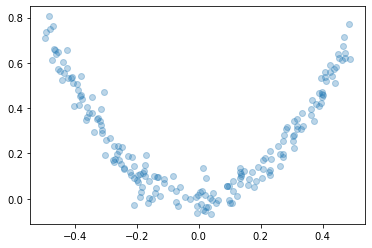

In [50]:
fig, ax = plt.subplots()
ax.scatter(X, y, alpha=0.3);

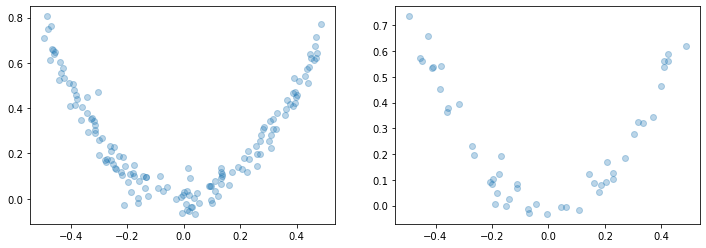

In [51]:
f, (ax0, ax1) = plt.subplots(ncols=2, figsize=(12,4))
ax0.scatter(X_train, y_train, alpha=0.3)
ax1.scatter(X_test, y_test, alpha=0.3);

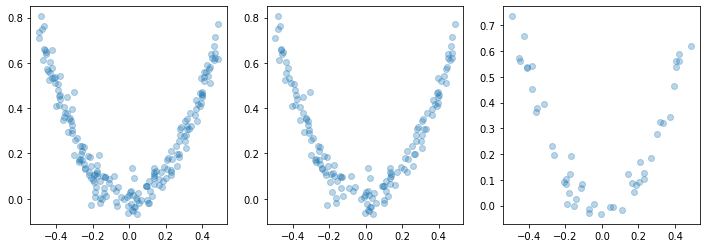

In [52]:
f, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(12,4))
ax0.scatter(X, y, alpha=0.3)
ax1.scatter(X_train, y_train, alpha=0.3)
ax2.scatter(X_test, y_test, alpha=0.3);

### Train iteratively on the residuals of its predecessor

In [53]:
# First iteration
tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=seed)
tree_reg1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [54]:
tree_reg1.score(X_train, y_train)

0.7664226476893785

In [56]:
cross_val_score(tree_reg1, X_train, y_train).mean()

0.706853106410284

In [57]:
# Second iteration
y2 = y_train - tree_reg1.predict(X_train)
y2

array([ 3.30154798e-03,  3.19955483e-02, -9.62530084e-02,  1.75181574e-01,
        1.69543309e-01,  2.21286564e-01,  8.26686747e-02, -8.12316769e-02,
       -1.81570847e-01, -4.18856474e-02, -7.71662713e-02, -9.57087064e-02,
        2.18077976e-01, -1.49712455e-01,  1.49976623e-01, -1.98858376e-01,
       -3.48273009e-02,  8.03963757e-02, -1.55889874e-02, -1.16599848e-01,
        1.48075610e-01, -1.58321608e-01, -1.29442126e-02, -1.93925856e-01,
        4.93577707e-03,  9.07166418e-02,  1.25645966e-01,  1.13649365e-01,
        7.09151390e-02,  1.61384963e-01,  4.44084868e-02,  1.03329799e-01,
       -2.24401114e-02, -1.50753543e-01, -8.14416729e-02, -3.07033755e-02,
       -3.85187237e-02, -5.95210523e-02,  3.39804367e-02,  5.77046544e-02,
        1.17373774e-02,  9.56074869e-02, -2.42620400e-02,  1.10759112e-01,
        9.19761023e-02, -1.26378697e-01,  7.94782440e-02,  5.13411421e-02,
        4.90761207e-03,  2.10007831e-01, -2.67057118e-02,  8.14032465e-02,
       -1.13835218e-01, -

In [58]:
tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=seed)
tree_reg2.fit(X_train, y2)

DecisionTreeRegressor(max_depth=2, random_state=42)

Let's make a function that will repeat this process for us

In [59]:
def my_gradient_boosting_regressor(n_estimators, X, y, random_state=27):
    # Save the iteratively trained models and residuals
    trained_weak_learners = []
    past_residuals = []
    
    # Initial conditions
    new_y = y
    past_residuals.append(new_y)
    # Iteratively train model
    for n in range(n_estimators):
        # Train the new model on past residuals (note first model trains on y)
        new_model = DecisionTreeRegressor(max_depth=2, random_state=random_state)
        new_model.fit(X, new_y)
        # Find the new residuals (used to train the next model)
        new_y = new_y - new_model.predict(X) 
        # Save the (trained) model and the new residuals
        trained_weak_learners.append(new_model)
        past_residuals.append(new_y)
        
    return trained_weak_learners, past_residuals

In [60]:
m, ys = my_gradient_boosting_regressor(3, X_train, y_train)

### Observe how the regressor gets better

In [65]:
def plot_preds(regressors, X, y, axes, label=None, style='r-', data_style='b.',
               data_label=None, ax=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    ax.plot(X[:, 0], y, data_style, label=data_label)
    ax.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        ax.legend(loc='upper center')

def gradient_boost_and_plot(n_estimators, X, y):
    
    fig_size = (16, 4*n_estimators)
    model_list, resid_list = my_gradient_boosting_regressor(16, X, y)
    f, axes = plt.subplots(nrows=n_estimators, ncols=2, figsize=fig_size)

    base_label ='h(x_1) = '
    iterative_label = 'y'
    for i in range(n_estimators):
        # Next set of residuals
        y = resid_list[i]
        # Must be a list of one item
        past_model = [model_list[i]]
        # Includes current model
        past_models = model_list[:(i+1)]
        # New labels
        new_label = f'h_{i}(x_{i})'
        base_label = f'{base_label} {new_label}'

        plot_preds(
            past_model,
            X,
            y,
            axes=[-0.5, 0.5, -0.1, 0.8], 
            label=f'${iterative_label}$',
            style="g-",
            data_label='Training set',
            ax=axes[i][0]
        )
        axes[i][0].set_title('Residuals and tree predictions')

        plot_preds(
            past_models,
            X,
            resid_list[0],
            axes=[-0.5, 0.5, -0.1, 0.8],
            label=f'${base_label}$',
            data_label='Training set',
            ax=axes[i][1]
        )
        axes[i][1].set_ylabel('$y$', fontsize=16, rotation=0)
        axes[i][1].set_title('Ensemble predictions')

        # Update labels for next round
        base_label = f'{base_label} + '
        iterative_label = f'{iterative_label} - {new_label}'
        
    return f, model_list, resid_list;

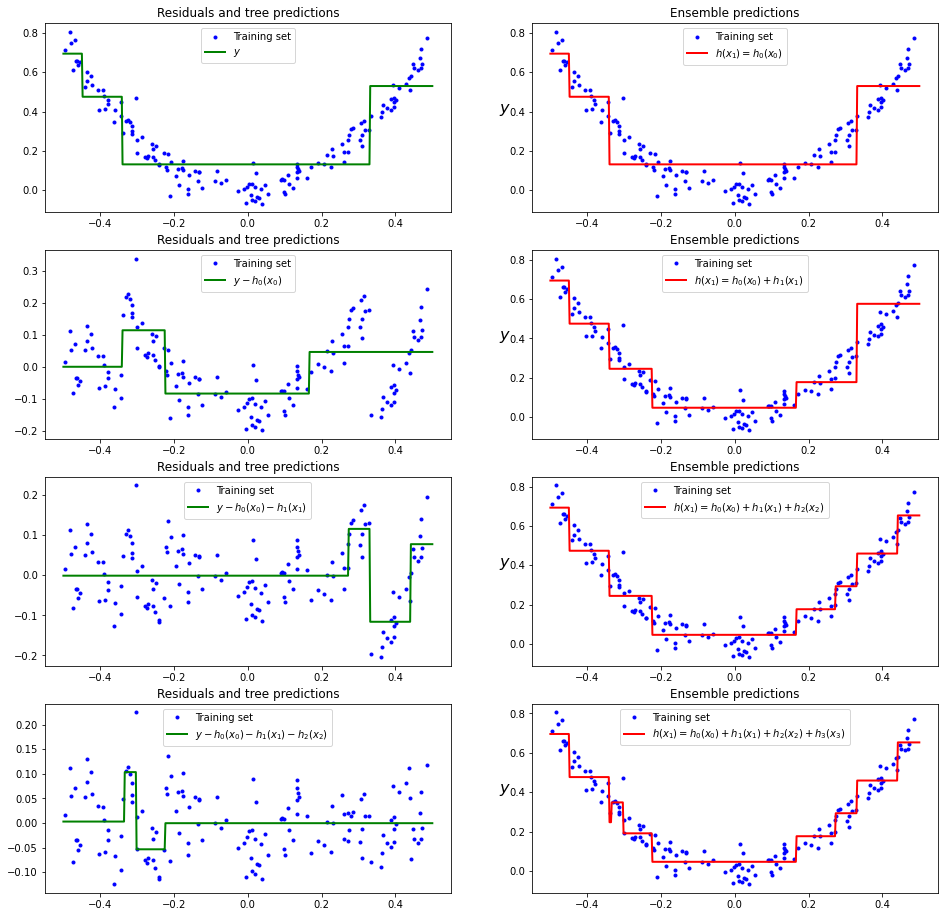

In [66]:
gradient_boost_and_plot(4, X_train, y_train);

### Using SciKit-learn's Gradient Boosting

In [68]:
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=4, learning_rate=1.0)
gbrt.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=4)

## Comparing gradient boosting with many estimators 

In [67]:
# More estimators
gbrt_slow = GradientBoostingRegressor(max_depth=2,
                                      n_estimators=100,
                                      learning_rate=0.1,
                                      random_state=seed)
gbrt_slow.fit(X_train, y_train)

# Even more estimators
gbrt_slower = GradientBoostingRegressor(max_depth=2,
                                        n_estimators=1000,
                                        learning_rate=0.1,
                                        random_state=seed)
gbrt_slower.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=1000, random_state=42)

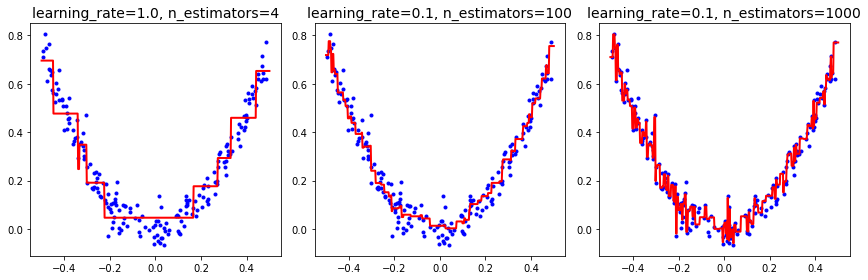

In [69]:
f, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(12, 4))

axes = [-0.5, 0.5, -0.1, 0.8]
plot_preds([gbrt], X, y, axes=axes, ax=ax0)
ax0.set_title(
    f"learning_rate={gbrt.learning_rate}, n_estimators={gbrt.n_estimators}",
              fontsize=14)

plot_preds([gbrt_slow], X, y, axes=axes, ax=ax1)
ax1.set_title(
    f"learning_rate={gbrt_slow.learning_rate}, n_estimators={gbrt_slow.n_estimators}",
              fontsize=14)

plot_preds([gbrt_slower], X, y, axes=axes, ax=ax2)
ax2.set_title(
    f"learning_rate={gbrt_slower.learning_rate}, n_estimators={gbrt_slower.n_estimators}",
              fontsize=14)

plt.tight_layout()

In [70]:
gbrt.score(X_train, y_train), gbrt.score(X_test, y_test)

(0.9372436970463155, 0.8842347761125001)

In [71]:
gbrt_slow.score(X_train, y_train), gbrt_slow.score(X_test, y_test)

(0.9769809166929815, 0.9473525403712995)

In [72]:
gbrt_slower.score(X_train, y_train), gbrt_slower.score(X_test, y_test)

(0.9994930542904391, 0.9356149544433409)

In [74]:
grid = {'n_estimators': [80, 90, 100, 110, 120],
       'max_depth': [2, 3, 4]}
gs_gb = GridSearchCV(GradientBoostingRegressor(random_state=seed), 
                     param_grid=grid, n_jobs=-3, verbose=3)

In [75]:
gs_gb.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-3)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-3)]: Done  20 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-3)]: Done  75 out of  75 | elapsed:    1.5s finished


GridSearchCV(estimator=GradientBoostingRegressor(random_state=42), n_jobs=-3,
             param_grid={'max_depth': [2, 3, 4],
                         'n_estimators': [80, 90, 100, 110, 120]},
             verbose=3)

In [76]:
gs_gb.best_params_

{'max_depth': 2, 'n_estimators': 80}

In [77]:
gs_gb.best_score_

0.9316932513500747

In [79]:
gs_gb.best_estimator_.score(X_test, y_test)

0.9472068964213739

In [88]:
gs_gb.best_estimator_.feature_importances_

array([1.])

# XGBoost

From [XGBoost's documentation](https://xgboost.readthedocs.io/):

>_**XGBoost** is an optimized distributed gradient boosting library designed to be highly **efficient**, **flexible** and **portable**. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way. The same code runs on major distributed environment (Hadoop, SGE, MPI) and can solve problems beyond billions of examples._

## XGBoost Regression

In [83]:
grad_boost = xgboost.XGBRegressor(random_state=42, objective='reg:squarederror')

grad_boost.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [85]:
cross_val_score(grad_boost, X_train, y_train, cv=5)

array([0.89748539, 0.89178824, 0.92807073, 0.93682086, 0.87767354])

In [86]:
grad_boost.score(X_test, y_test)

0.9336302739749714

In [87]:
grad_boost.feature_importances_

array([1.], dtype=float32)

# Level Up: Regression or Classification?

What does my target look like?

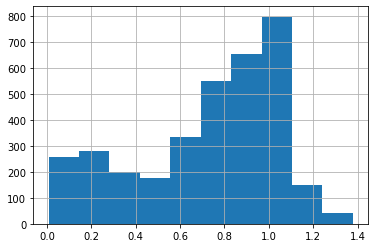

In [89]:
galaxies['Mcz'].hist();

There seems to be a bit of a bimodal shape here. We might therefore try predicting whether the redshift factor is likely to be greater or less than 0.5:

In [90]:
galaxies['bool'] = galaxies['Mcz'] > 0.5

In [91]:
galaxies.tail()

,Nr,Rmag,e.Rmag,ApDRmag,mumax,Mcz,e.Mcz,MCzml,chi2red,UjMAG,...,e.UFS,BFS,e.BFS,VFD,e.VFD,RFS,e.RFS,IFD,e.IFD,bool
3457,9990,24.962,0.186,-0.113,25.189,0.960,0.190,0.951,0.89,-18.21,...,0.00170,0.00361,0.001150,0.00489,0.00147,0.00625,0.000413,0.00987,0.00323,True
3458,9992,21.918,0.017,-0.562,23.063,0.770,0.031,0.766,0.90,-20.47,...,0.00218,0.04500,0.001310,0.05130,0.00173,0.07210,0.000542,0.10200,0.00477,True
3459,9995,23.701,0.051,-0.437,24.053,0.775,0.121,1.330,0.60,-18.76,...,0.00223,0.01850,0.001090,0.01450,0.00182,0.01580,0.000468,0.01860,0.00484,True
3460,9996,23.473,0.098,-1.114,25.075,0.926,0.087,0.870,1.01,-19.67,...,0.00225,0.00809,0.001190,0.01140,0.00166,0.01070,0.000454,0.01930,0.00390,True
3461,9997,25.621,0.298,-0.224,25.488,0.968,0.139,0.957,1.13,-17.70,...,0.00165,0.00315,0.000949,0.00247,0.00131,0.00317,0.000426,0.00746,0.00415,True


In [92]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(galaxies_x_rev, galaxies['bool'])

## Adaboost Classification

In [93]:
abc = AdaBoostClassifier(random_state=42)

abc.fit(x_train2, y_train2)

AdaBoostClassifier(random_state=42)

In [94]:
abc.score(x_test2, y_test2)

0.8883720930232558

In [95]:
precision_score(y_test2, abc.predict(x_test2))

0.8954154727793696

In [96]:
recall_score(y_test2, abc.predict(x_test2))

0.9645061728395061

## GradientBoosting

In [97]:
gbc = GradientBoostingClassifier(random_state=42)

gbc.fit(x_train2, y_train2)

GradientBoostingClassifier(random_state=42)

In [98]:
gbc.score(x_test2, y_test2)

0.8872093023255814

In [99]:
precision_score(y_test2, gbc.predict(x_test2))

0.8952654232424677

In [100]:
recall_score(y_test2, gbc.predict(x_test2))

0.9629629629629629

In [101]:
confusion_matrix(y_test2, gbc.predict(x_test2))

array([[139,  73],
       [ 24, 624]])

## XGBoost Classification

In [102]:
grad_boost_class = xgboost.XGBClassifier(random_state=42, objective='binary:logistic')

grad_boost_class.fit(x_train2, y_train2)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [103]:
grad_boost_class.score(x_test2, y_test2)

0.8906976744186047

In [105]:
recall_score(y_test2, grad_boost_class.predict(x_test2))

0.9660493827160493

In [106]:
confusion_matrix(y_test2, grad_boost_class.predict(x_test2))

array([[140,  72],
       [ 22, 626]])